### Описание
На этот раз данные имеют следующую структуру:

записываются для каждого пользователя, совершившего покупки, каждый день
для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
внутри каждой папки есть файл data.csv, где и хранятся данные
Схематично выглядит так:

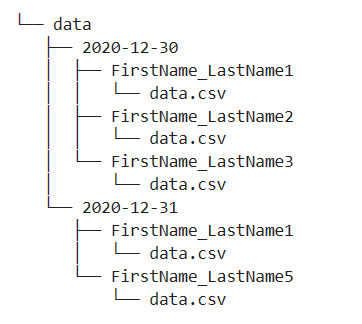

Например, 30 декабря три покупателя сделали покупки, 31 – два (папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

Note: данные в задании покрывают другой временной период, имена тоже другие. Подробности, примеры и возможные подсказки можно найти в текстах следующих шагов.

### Задачи
1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)
2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?
4. Визуализируйте продажи по дням.
5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.

# Задание 1

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем).

Пример итоговой таблицы:

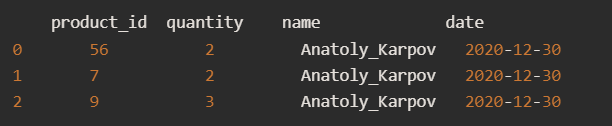

Для объединения датафреймов, читаемых из файлов, можно использовать метод pd.concat(). Например:

1. Имеются следующие данные:


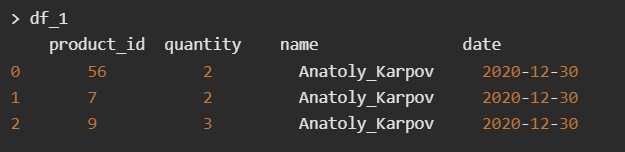

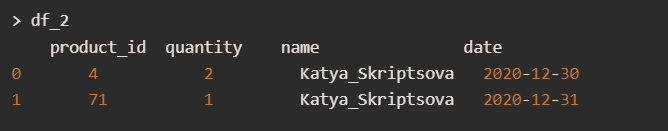

2. Соединяем, передав pd.concat на вход список датафреймов, которые нужно объединить. Обратите внимание: индексы повторяются, поэтому после соединения всех данных нужно их сбросить.
df = pd.concat([df_1, df_2])
df:

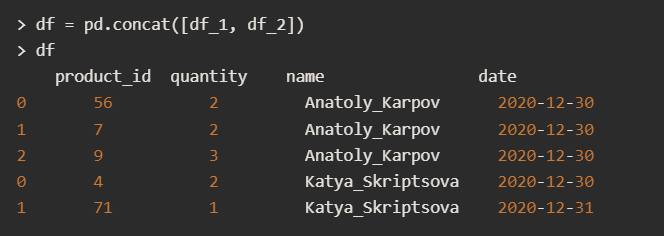

В качестве ответа укажите сумму по колонке quantity.

**Также могут пригодиться:**

- Просмотр содержимого папок
- Циклы
- Сбросить индексы
- Присоединить датафрейм

In [33]:
import pandas as pd
import os

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [12]:
tree = os.walk('data')

#path, directories (folders), files
for i in tree:
    print(i)

('data', ['2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09'], [])
('data\\2020-12-03', ['Alexey_Smirnov', 'Anton_Petrov', 'Kirill_Petrov', 'Petr_Fedorov', 'Vasiliy_Ivanov', 'Vasiliy_Petrov'], [])
('data\\2020-12-03\\Alexey_Smirnov', [], ['data.csv'])
('data\\2020-12-03\\Anton_Petrov', [], ['data.csv'])
('data\\2020-12-03\\Kirill_Petrov', [], ['data.csv'])
('data\\2020-12-03\\Petr_Fedorov', [], ['data.csv'])
('data\\2020-12-03\\Vasiliy_Ivanov', [], ['data.csv'])
('data\\2020-12-03\\Vasiliy_Petrov', [], ['data.csv'])
('data\\2020-12-04', ['Alexey_Smirnov', 'Kirill_Fedorov', 'Petr_Fedorov', 'Petr_Ivanov', 'Petr_Smirnov', 'Rostislav_Fedorov', 'Rostislav_Ivanov', 'Rostislav_Smirnov', 'Vasiliy_Ivanov'], [])
('data\\2020-12-04\\Alexey_Smirnov', [], ['data.csv'])
('data\\2020-12-04\\Kirill_Fedorov', [], ['data.csv'])
('data\\2020-12-04\\Petr_Fedorov', [], ['data.csv'])
('data\\2020-12-04\\Petr_Ivanov', [], ['data.csv'])
('data\\2020-12-04\\Petr_Sm

In [13]:
tree = os.walk('data')
data_files = []
target_file = 'data.csv'

for i in tree:
    files = i[-1]

    if len(files) > 0 and target_file in files:
        path = os.path.join(i[0], target_file)
        data_files.append(path)

In [14]:
data_files

['data\\2020-12-03\\Alexey_Smirnov\\data.csv',
 'data\\2020-12-03\\Anton_Petrov\\data.csv',
 'data\\2020-12-03\\Kirill_Petrov\\data.csv',
 'data\\2020-12-03\\Petr_Fedorov\\data.csv',
 'data\\2020-12-03\\Vasiliy_Ivanov\\data.csv',
 'data\\2020-12-03\\Vasiliy_Petrov\\data.csv',
 'data\\2020-12-04\\Alexey_Smirnov\\data.csv',
 'data\\2020-12-04\\Kirill_Fedorov\\data.csv',
 'data\\2020-12-04\\Petr_Fedorov\\data.csv',
 'data\\2020-12-04\\Petr_Ivanov\\data.csv',
 'data\\2020-12-04\\Petr_Smirnov\\data.csv',
 'data\\2020-12-04\\Rostislav_Fedorov\\data.csv',
 'data\\2020-12-04\\Rostislav_Ivanov\\data.csv',
 'data\\2020-12-04\\Rostislav_Smirnov\\data.csv',
 'data\\2020-12-04\\Vasiliy_Ivanov\\data.csv',
 'data\\2020-12-05\\Alexey_Fedorov\\data.csv',
 'data\\2020-12-05\\Alexey_Petrov\\data.csv',
 'data\\2020-12-05\\Kirill_Smirnov\\data.csv',
 'data\\2020-12-05\\Petr_Ivanov\\data.csv',
 'data\\2020-12-05\\Petr_Smirnov\\data.csv',
 'data\\2020-12-05\\Rostislav_Smirnov\\data.csv',
 'data\\2020-12-06\\

In [21]:
files_df = []

for path in data_files:
    df = pd.read_csv(path, index_col=0)

    date, name = path.split('\\')[1:3]
    df['name'] = name
    df['date'] = date
    files_df.append(df)

In [23]:
data = pd.concat(files_df, ignore_index=True)
data.head(10)

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
5,94,4,Alexey_Smirnov,2020-12-03
6,56,5,Anton_Petrov,2020-12-03
7,27,3,Anton_Petrov,2020-12-03
8,82,1,Anton_Petrov,2020-12-03
9,61,1,Anton_Petrov,2020-12-03


В качестве ответа укажите сумму по колонке quantity

In [24]:
data.quantity.sum()

480

# Task 2

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке. Например:
Anatoly_Karpov, Nekto_Ktotovich, Lena_Uhanova, Ignat, Sasha_Tokarev

In [25]:
quantity_buy = data.groupby('name').quantity.sum()
max_quantity = quantity_buy.max()
max_quantity

52

In [27]:
quantity_buy.loc[quantity_buy == max_quantity].index.sort_values()

Index(['Alexey_Smirnov', 'Petr_Smirnov'], dtype='object', name='name')

# Task 3

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:

по оси x – идентификаторы товаров (product_id) 
по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)
Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.

In [29]:
prod_sold = data.groupby('product_id', as_index=False).quantity.sum()
prod_sold.head()

,product_id,quantity
0,0,4
1,1,4
2,3,8
3,4,6
4,6,10


In [31]:
prod_sold = prod_sold.sort_values('quantity', ascending=False).head(10)
prod_sold

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


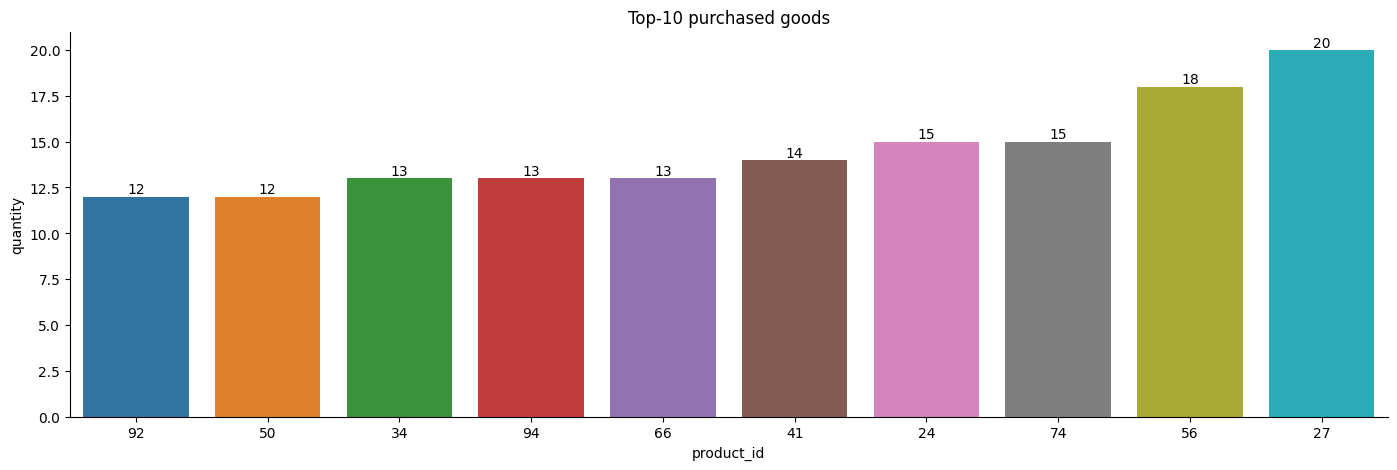

In [36]:

fig, ax = plt.subplots(figsize=(17,5))
sns.barplot(data=prod_sold, x='product_id', y='quantity',
            order=prod_sold.sort_values('quantity').product_id, ax=ax)
ax.bar_label(ax.containers[0])
ax.set_title('Top-10 purchased goods')
sns.despine()

In [37]:
prod_sold.loc[prod_sold.product_id == 56]

,product_id,quantity
42,56,18


# Task 4
Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date). Далее выберите верные утверждения:

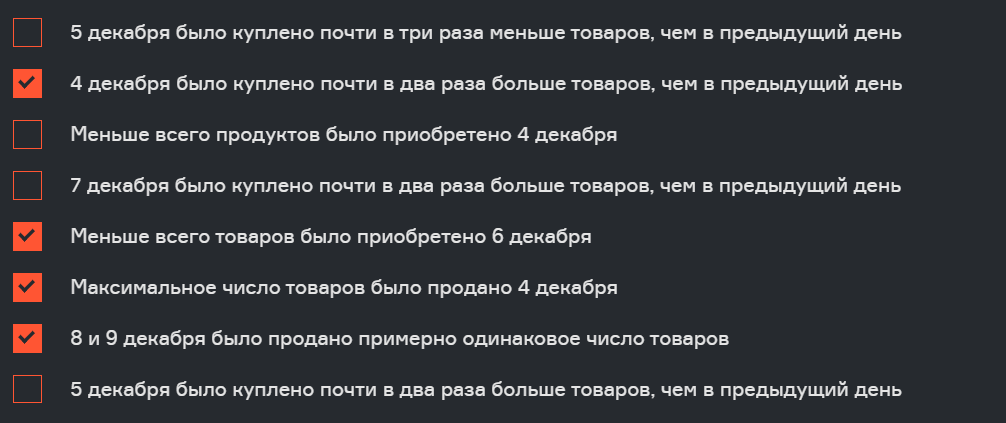

In [38]:
quantity_by_date = data.groupby('date', as_index=False) \
                     .agg({'quantity' : 'sum'}) \
                     .sort_values('quantity', ascending=False) 

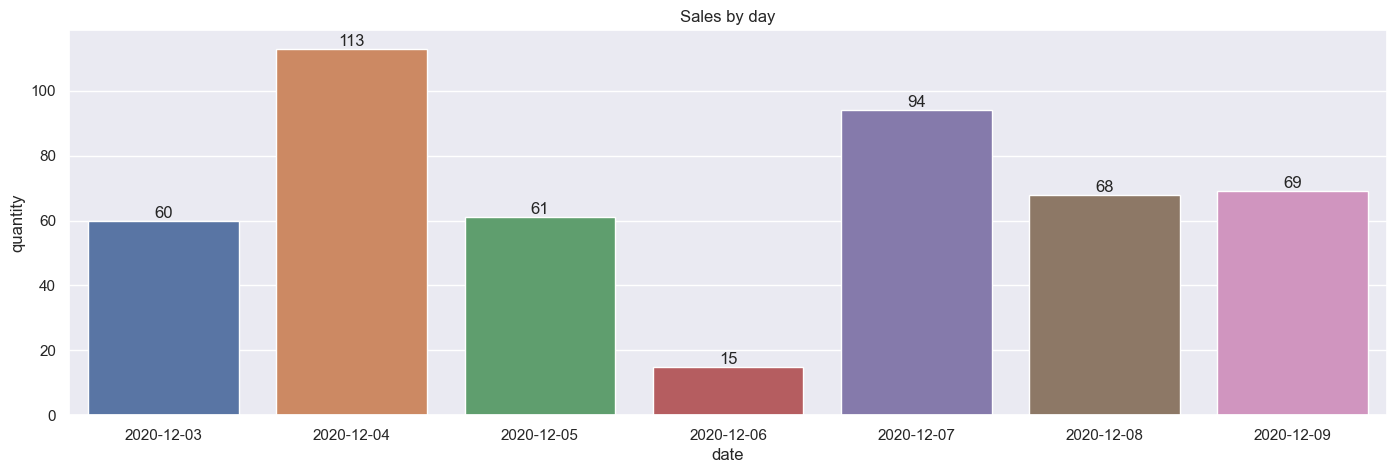

In [40]:
fig, ax = plt.subplots(figsize=(17,5))
ax = sns.barplot(x='date', y='quantity',order=['2020-12-03',
                                               '2020-12-04', 
                                               '2020-12-05', 
                                               '2020-12-06', 
                                               '2020-12-07', 
                                               '2020-12-08', 
                                               '2020-12-09'], 
                 data=quantity_by_date)
ax.bar_label(ax.containers[0])
ax.set_title('Sales by day')
sns.set(rc = {'figure.figsize':(16,8)})